### Load  and filter data

In [1]:
from topicnet.cooking_machine.pretty_output import make_notebook_pretty
make_notebook_pretty()

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm
import numpy as np

import os
import shutil
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config

### Constructing inital Topic Model

In [2]:

with open("../cooking_machine/recipes/ARTM_baseline.yml", "r") as f:
    yaml_string = f.read()

DATASET_PATH = 'PScience.csv'
specific_topics = [f'topic_{i}' for i in range(15)]
background_topics = [f'bcg_{i}' for i in range(len(specific_topics),len(specific_topics) + 1)]

yaml_string = yaml_string.format(
    modality_list=['@word'],
    main_modality='@word',
    dataset_path=DATASET_PATH,
    specific_topics=specific_topics,
    background_topics=background_topics)

print(yaml_string)



# This config follows a strategy described by Murat Apishev
# one of the core programmers of BigARTM library in personal correspondence.
# According to his letter 'decent' topic model can be obtained by
# Decorrelating model topics simultaneously looking at retrieved TopTokens


# Use .format(modality_list=modality_list, main_modality=main_modality, dataset_path=dataset_path,
# specific_topics=specific_topics, background_topics=background_topics)
# when loading the recipe to adjust for your dataset

topics:
# Describes number of model topics, better left to the user to define optimal topic number
    specific_topics: ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14'] 
    background_topics: ['bcg_15']

# Here is example of model with one modality
regularizers:
    - DecorrelatorPhiRegularizer:
        name: decorrelation_phi
        topic_names: specific_topics
      

In [3]:
EXPERIMENT_PATH = '/data_mil/vbulatov/blei_recipe/'


In [4]:
! rm -rf $EXPERIMENT_PATH

In [5]:

if not os.path.exists(EXPERIMENT_PATH):
    os.mkdir(EXPERIMENT_PATH)


experiment, dataset = build_experiment_environment_from_yaml_config(
    yaml_string,
    experiment_id="Test_config",
    save_path=EXPERIMENT_PATH,
    # force_single_thread=True
)


In [6]:
experiment.run(dataset)

/home/vbulatov/Projects/topicnet/cooking_machine/cubes/base_cube.py:206: UserWarning: Perplexity is too high for threshold 1.05
  warnings.warn(warning_message)


{<topicnet.cooking_machine.models.topic_model.TopicModel at 0x7f45647b3550>}

In [7]:
experiment.show()

Experiment Test_config

Experiment was made with BigARTM 0.9.0
Tree:
                            ┌##16h06m37s_08d11m2019y###
                            ├##16h06m59s_08d11m2019y###
                            ├##16h07m22s_08d11m2019y###
                            ├##16h07m44s_08d11m2019y###
                            ├##16h08m07s_08d11m2019y###
                            ├##16h08m30s_08d11m2019y###
                            ├##16h08m52s_08d11m2019y###
                            ├##16h09m15s_08d11m2019y###
<<<<<<<<<<<root>>>>>>>>>>>──┤
                            ├##16h09m37s_08d11m2019y###
                            ├##16h09m59s_08d11m2019y###
                            ├##16h10m22s_08d11m2019y###
                            ├##16h10m44s_08d11m2019y###
                            ├##16h11m06s_08d11m2019y###
                            ├##16h11m29s_08d11m2019y###
                            ├##16h11m52s_08d11m2019y###
                            ├##16h12m15s_08d11m2019y###
     

In [8]:
best_model = experiment.select(experiment.criteria[-1][0])[0]


In [9]:
best_model.describe_regularizers()

tau  gamma
model_id                   regularizer_name                   
##16h12m15s_08d11m2019y### smooth_phi_bcg      8.303091    NaN
                           smooth_theta_bcg   46.798799    NaN
                           decorrelation_phi   0.140000    0.0

In [11]:
best_model.describe_scores()

last_value
model_id                   score_name                                                                           
##16h12m15s_08d11m2019y### PerplexityScore@all                                                           3578.62
                           SparsityThetaScore                                                          0.0311949
                           SparsityPhiScore@word                                                        0.498365
                           PerplexityScore@word                                                          3578.62
                           TopicKernel@word.average_coherence                                                  0
                           TopicKernel@word.average_contrast                                             0.53735
                           TopicKernel@word.average_purity                                              0.550919
                           TopicKernel@word.average_size                                                 1422.94
                           TopicKernel@word.coherence          {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@word.contrast           {'topic_0': 0.48187097907066345, 'topic_1': 0....
                           TopicKernel@word.purity             {'topic_0': 0.4380197525024414, 'topic_1': 0.4...
                           TopicKernel@word.size               {'topic_0': 473.0, 'topic_1': 565.0, 'topic_2'...
                           TopicKernel@word.tokens             {'topic_0': ['england', 'физтех', 'зверюшка', ...
                           BleiLaffertyScore                                                            0.416972

## Let's look at plots

Solid line represent the best model we have selected; dashed lines are the rest. 

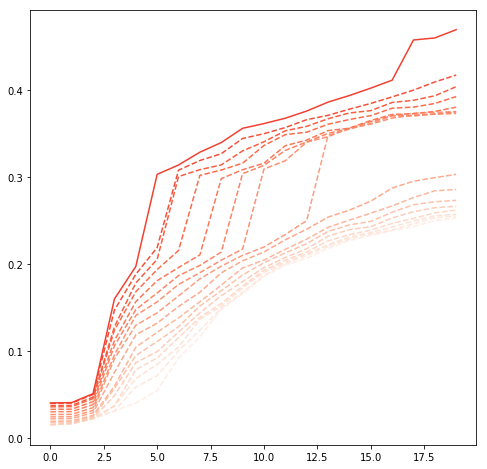

In [23]:


tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['BleiLaffertyScore']
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

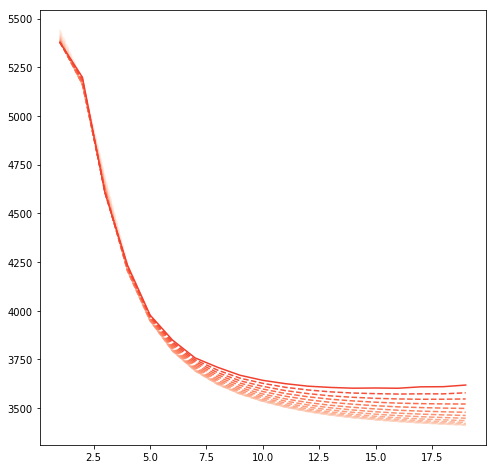

In [24]:


tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    score[0] = float("nan")
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

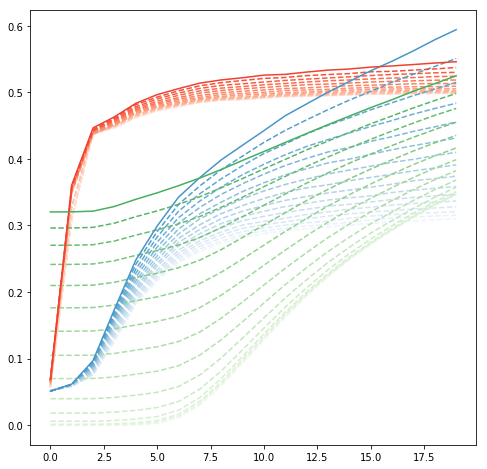

In [26]:


tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@word.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@word.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    
    score = tm.scores['SparsityPhiScore@word']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

### Investigate model 

In [15]:
from topicnet.viewers.top_tokens_viewer import TopTokensViewer
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer

In [16]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html(first_model_top_tok.view())
first_model_top_doc = TopDocumentsViewer(best_model, dataset=dataset).view()


In [21]:
from IPython.display import display_html, display
from topicnet.cooking_machine.dataset import get_modality_vw


n=None
for line, topic_docs in list(zip(first_model_html, first_model_top_doc))[:n]:
    display_html(line, raw=True)
    for doc_id in topic_docs:
        doc_vw = dataset.get_vw_document(doc_id).values[0][0]
        doc_title = get_modality_vw(doc_vw, "@title")
        doc_snippet = get_modality_vw(doc_vw, "@snippet")
        display_html(f"<b>{doc_title}</b><br />{doc_snippet}", raw=True)



,topic_0 @word
наука,0.02997
учёный,0.01753
заниматься,0.01496
университет,0.0147
хороший,0.01429
школа,0.01246
работать,0.01209
работа,0.0113
должный,0.01111
студент,0.00992


прямая речьартём оганов химик, профессор университета штата нью-йорк о советском образовании, «наркотических городах» и перспективах работы в россии

прямая речьфуад алескеров математик, руководитель департамента математики факультета экономики вшэ о проблемах российского образования, предсказаниях биржи и качествах ученого

точка зрения # проблема преподавания химии в школе мнения экспертов постнауки об основных проблемах преподавания химии в средней школе

точка зрения # проблемы коммуникации ученых и сми мнения экспертов постнауки о том, с какими трудностями сталкиваются ученые при общении с представителями средств массовой информации

точка зрения # физика в школе мнения экспертов постнауки об основных проблемах преподавания физики в средней школе

точка зрения # зачем нужен «список вак» и когда его отменят? мнения экспертов постнауки о публикациях в «ваковских журналах» и получении научной степени

университетская реформа уварова историк елена вишленкова о реформе ученых степеней, отмене докторских экзаменов и «новых русских профессорах» xix века

перспективыбыть социологом социолог виктор вахштайн рассказывает, откуда берутся социологи, чему и как их учат и зачем они нам нужны

точка зрения # нужен ли пиар вузам? мнения экспертов постнауки, необходимо ли академическим институтам продвигать свою деятельность

точка зрения # «покупка» иностранных профессоров мнения экспертов постнауки о роли зарубежных специалистов в российской науке

,topic_1 @word
культура,0.02809
ребёнок,0.0279
фильм,0.02408
искусство,0.01742
музей,0.01157
кино,0.00915
герой,0.00841
театр,0.00774
зритель,0.00668
художник,0.00544


главы # цирк в пространстве культуры отрывок из книги «цирк в пространстве культуры» филолога и историка ольги бурениной-петровой об особенностях советского цирка первой половины xx века

оценка погружения в кинопросмотр социолог дмитрий рогозин о методике изучения зрительского погружения в просмотр фильма на примере «добро пожаловать в зомбиленд»

штурмуя публичное пространствослова о гетеротопии плохого вкуса философ александр павлов о теории кэмпа сьюзен сонтаг, русской традиции кинокритики и утопии хорошего вкуса

главы«коммунистово воскресение — 25 октября» отрывок из книги историка наталии лебиной «cоветская повседневностьнормы и аномалии. от военного коммунизма к большому стилю»

практики построения личности в утопических сообществах как педагогические технологии влияли на жизнь советских детей и подростков

,topic_2 @word
клетка,0.04499
организм,0.02263
молекула,0.01684
днк,0.01559
белка,0.01366
пациент,0.01318
бактерия,0.01237
болезнь,0.01098
белок,0.01082
заболевание,0.01016


трансгенные животные и продление жизни биолог алексей москалев о генетике старения, регуляции метаболизма и геропротекторах

вич-ассоциированное поражение миокарда и способы его защиты способен ли антиоксидант процистеин предотвращать развитие вич-индуцированной кардиомиопатии

инсультпричины и симптомы что является причиной инсульта, какие симптомы помогут его распознать и какие способы лечения практикуются в современной медицине

,topic_3 @word
книга,0.07997
текст,0.04022
автор,0.02954
писать,0.02814
русский,0.02666
написать,0.02169
литература,0.01788
читать,0.01505
письмо,0.01349
читатель,0.01293


повседневный быт московских цензоров филолог алина бодрова об авторах, издателях и цензорах журнала «москвитянин»

,topic_4 @word
право,0.06488
история,0.05839
историк,0.03323
закон,0.02666
сталин,0.02115
прошлое,0.0211
документ,0.01627
суд,0.01386
правовой,0.01019
средневековый,0.00955


кондикция владения юрист денис новак о защите при неправомерном лишении владения, виндикационном и кондикционном исках и ценности владения имуществом

главы # король не умирает никогда отрывок из книги «два тела короля. исследование по средневековой политической теологии» медиевиста эрнста канторовича

,topic_5 @word
звезда,0.02762
земля,0.02578
вселенная,0.02468
галактика,0.01987
планета,0.01681
солнце,0.01546
атмосфера,0.00898
наблюдение,0.00841
планет,0.0078
миллиард,0.00688


faqприрода вулканов физик олег мельников о самых крупных извержениях в истории земли, доисторических потоках пепла от вулканов и видах проявлений вулканизма

5 мифов о солнце эксперты постнауки развенчивают мифы о единственной звезде нашей планетной системы

астероиды солнечной системы астроном владимир бусарев о строении вещества астероидов, их таксономических типах и источниках возникновения земной жизни

kepler-452bкак находят «вторые земли»? астроном дмитрий ионов объясняет, чем интересна новая экзопланета и может ли на ней существовать жизнь

главыгорячее дыхание земли отрывок из книги «земля. метеориты, вулканы, землетрясения» геолога николая короновского о внутреннем строении земли и наиболее опасных геологических явлениях

черные дыры в центрах галактик астрофизик ольга сильченко об открытии сверхмассивной черной дыры в туманности андромеды, исследованиях джона корменди и темных гравитирующих телах

формирование планет и протопланетные диски астрофизик сергей попов об образовании планетных систем, снеговой линии и облаке оорта

атмосферы экзопланет астрофизик сергей попов о способах изучения атмосферы, структуре внешних слоев газовой оболочки планет и горячих юпитерах

многообразие планет астрофизик сергей попов о газовых и ледяных гигантах, системах двойных звезд и одиночных планетах

полярные диски в галактиках астрофизик ольга сильченко о галактиках с полярными кольцами, холодной аккреции филаментов и химическом составе газа в полярных дисках

,topic_6 @word
язык,0.06828
слово,0.04342
мозг,0.02426
память,0.01303
нейрон,0.01042
говорить,0.00996
словарь,0.00819
речь,0.00815
звук,0.00801
буква,0.00801


эмоции в музыкевосприятие расстояний в тональном поле нейропсихолог марина корсакова-крейн о квинтовом круге, улавливании расстояний в тональном пространстве и важности интуиции в восприятии музыки

падежи в языках мира лингвист петр аркадьев о роли падежей в русской грамматике и их аналогах в других языках

языковая сложность лингвист александр пиперски о лингвистическом изучении сложности, формализованных языковых описаниях и взаимнооднозначности соответствия между формой и значением

синтаксические модели лингвист екатерина лютикова о синтаксических категориях, частеречной характеристике слова и соотношении морфологической и синтаксической зависимостей

метод записи движений глаз в психолингвистике психолингвист ирина секерина о «привязке» движений глаз к языковой деятельности, парадигме «визуального мира» и специальных стимульных материалах

грамматика адыгейского языка лингвист петр аркадьев о полисинтетизме, особенностях абхазо-адыгских языков и грамматических уровнях

модели памяти в когнитивной психологии психолог мария фаликман о системах памяти, принципах хранения информации и причинах забывания

гласные русского языка лингвист игорь исаев об истории гласных в литературном языке, следах утраченных букв и особенностях говоров

двуязычные словари лингвист дмитрий добровольский о необходимости больших академических словарей, поливариантности немецкого языка и сложностях перевода фразеологизмов

лексическая сочетаемость лингвист александр пиперски о парадоксальных словосочетаниях, модели мешка слов и использовании логарифмов в лингвистике

,topic_7 @word
церковь,0.04763
христианский,0.03221
христианство,0.02817
мода,0.02656
кавказ,0.02094
рим,0.0205
арабский,0.01842
церковный,0.01763
араб,0.01286
ледник,0.01197


,topic_8 @word
животное,0.02025
вид,0.01556
женщина,0.0129
растение,0.0126
эволюция,0.01031
поведение,0.00934
мужчина,0.00901
самец,0.00824
птица,0.00793
самка,0.00737


главыот секса до зачатия отрывок из книги биолога роберта мартина «как мы делаем это» о том, что известно науке о сексе и системе половых отношений

«социальная моногамия совершенно не коррелирует с сексуальной моногамией» интервью с биологом андреем чабовским о феномене моногамии, теории конфликта полов и причинах привязанности между партнерами

главы # коэволюция. сплетая паутину жизни глава из книги "эволюциятриумф идеи" исследователя в yale university's morse college карла циммера

главы # сексуальные привилегии отрывок из книги «политика у шимпанзе. власть и секс у приматов» нидерландского приматолога и этолога франса де валя

варвара веденина"половой отбор не всегда противоречит естественному" интервью с биологом варварой ведениной о гипотезах, объясняющих выбор самок, и генетической детерминации механизмов полового отбора

исследования моногамии у животных биолог андрей чабовский о формах взаимоотношений между полами, гормоне вазопрессин и экспресс-методах оценки моногамности

главы # парадокс измены отрывок из книги «химия любви» профессора психиатрии медицинской школы университета эмори ларри янга и автора научно-популярных книг по биологии брайана александера

гендерные особенности инсомнии сомнолог михаил полуэктов о различиях инсомнии мужчин и женщин, социальных рисках бессонницы и проявлениях сонных расстройств при неврозах

архат абжанов«строение черепа птицы унаследовали от динозавров» биолог архат абжанов об эволюции птиц, строении их черепа и общих чертах с крокодилами

«в норме альтруисты должны отбраковываться, несмотря на то что они полезны для группы» интервью с биологом александром марковым о генах альтруизма, эволюционном отборе и отказе от размножения

,topic_9 @word
государство,0.01974
страна,0.01952
власть,0.01643
россия,0.01608
общество,0.01587
политический,0.01369
война,0.01225
политика,0.00957
германия,0.00681
свобода,0.00661


выборы президента сша как проходят президентские выборы в соединенных штатах америки, что такое праймериз и кокусы и как работает принцип «победитель получает все»

арабская весна арабист рами эль-кальюби об истории «арабской весны», значении социальных медиа в этом процессе и последствиях протестов

первая мировая войнапричины и последствия о россии в первой мировой, ключевых событиях и этапах войны, тотальном характере и ее итогах

главыконституционные революции отрывок из книги «революции. очень краткое введение» социолога и политолога джека а. голдстоуна о революциях в америке, франции, европе (1830 и 1848 гг.) и японии эпохи мэйдзи

северная и южная кореяистория разделения историк наталья ким о последствиях колонизации кореи, влиянии ссср и сша на разделение этноса и проблемах в отношениях двух государств

русский анархизм историк александр шубин об анархистских течениях в россии, противоречиях между бакуниным и марксом и научном анархизме кропоткина

левый терроризм в германии историк илья женин о студенческих протестах 1968 года, «фракции красной армии» и трагических событиях «немецкой осени»

«национал-социализм сыграл роковую роль в воспитании немецкого духа» интервью с историком ильей жениным о веймарской республике, советско-германских отношениях и немецком коллективизме

диктатура монтаньяров историк дмитрий бовыкин о якобинском клубе, политической карьере робеспьера и падении диктатуры монтаньяров

патриотическая риторика в годы гражданской войны историк людмила новикова об антибольшевистском лагере, красной пропаганде и мифе об интервенции

,topic_10 @word
частица,0.02242
энергия,0.01598
электрон,0.01149
атом,0.01136
кварк,0.01014
эксперимент,0.00907
свет,0.00891
свойство,0.00834
фотон,0.00806
физика,0.00771


лептоны и нейтрино физик дмитрий казаков о трех поколениях лептонов, эффекте нейтринных осцилляций и роли нейтрино в космологии

история ускорителей атомных ядер физик григорий трубников об эволюции ускорителей, их видах и перспективах работы большого адронного коллайдера

элементарные частицы физик дмитрий казаков об истории открытия, свойствах и классификации элементарных частиц

faqтоп-кварк 7 фактов о наиболее массивной частице стандартной модели

faqкварки 5 фактов о поколениях фундаментальных частиц стандартной модели и появлении «очарованной физики», обьясняющей взаимодействие элементарных частиц

адроны физик дмитрий казаков о мире мезонов и барионов, свойствах кварков и адронных резонансах

faqвакуум как дуальный сверхпроводник 5 фактов о теории сильных взаимодействий

faqcp-нарушение в кварках 7 фактов о смешивании поколений кварков, экспериментах на бак и асимметрии в мире элементарных частиц

faqальтернативные механизмы сверхпроводимости 5 фактов о высокотемпературной сверхпроводимости и возможности ее достижения

симметрии в мире элементарных частиц физик дмитрий казаков о типах преобразований в физике частиц, лоренц-инвариантности и нарушениях симметрии

,topic_11 @word
понятие,0.01048
отношение,0.00968
являться,0.00914
философия,0.00785
представление,0.00722
социальный,0.00683
социология,0.00666
действие,0.00649
смысл,0.0063
знание,0.0063


социологическая теория познанияшколы и направления социолог виктор вахштайн о ключевых фигурах, вопросах и главных спорах эпистемологии

к логике демаркации«зеленая линия» социальных наук где проходит граница между прикладным и теоретическим в социологии, и как она конструируется?

теория действия в социологии о доминирующих подходах к пониманию социального действия, истории исследований, природе действия и теории сингулярной каузальности

инциденты на дисциплинарных границах каковы «языковые» и «жанровые» отличия социологии от социальной антропологии?

главы # общественные науки и легитимность согласия отрывок из книги социологов люка болтански и лорана тевено "критика и обоснование справедливостиочерки социологии градов"

к социологической «теории относительности» события шредингерапример блефа в игре в покер

формула сообщества почему понятие сообщества утрачивает значение?

американская историческая социология об изменчивости и специфичности прошлого историк ирина савельева о проблеме междисциплинарности, «историческом повороте» и отношениях между историками и социологами

5 книг о посткритической социологии что читать о критике социологии как науки, рекомендует кандидат социологических наук виктор вахштайн

главная проблема философии шеллинга философ петр резвых о единстве шеллинговской философии, интеллектуальном созерцании и методическом антропоморфизме

,topic_12 @word
бог,0.01185
имя,0.01137
территория,0.0102
остров,0.00837
народ,0.00776
царь,0.00736
король,0.00697
миф,0.00682
восток,0.00536
традиция,0.00528


главы # антропоморфная пластика, происходящая из святилищ кавказа отрывок из книги "древняя бронзовая антропоморфная пластика кавказа" историка ольги брилевой

главы # страницы истории отрывок из монографии доктора исторических наук в.в. наумкина «острова архипелага сокотра (экспедиции 1974–2010 гг.)»

главыбильгамес в истории отрывок из книги «гильгамеш. биография легенды» шумеролога владимира емельянова о роли фигуры гильгамеша в мировой истории и культуре

«с момента крещения руси каждый князь рюрикович обладал как минимум двумя именами» интервью с филологом федором успенским о традиции династических имен рюриковичей, системе двуименности и судьбе сыновей владимира святого

гильгамеш исторический и культовый историк владимир емельянов о происхождении, культе и трансформации героического образа гильгамеша

язык династических имен в домонгольской руси какими принципами руководствовались княжеские семьи при выборе родовых имен?

главы # территория украиныисторическое ядро и позднейшие приращения отрывок из книги «очерки истории украины в средние века и раннее новое время» профессора киево-могилянской академии наталии яковенко

открытие черного моря греками историк аскольд иванчик о великой греческой колонизации, космологическом значении океана и мифах о черном море

faqмиф о короле артуре 5 фактов об одной из самых загадочных и противоречивых фигур v–vi веков

царские курганы скифов историк аскольд иванчик об археологических источниках культуры скифов, символах погребений и признаках легитимности царской власти

,topic_13 @word
город,0.04356
технология,0.02561
пространство,0.02271
компьютер,0.02024
сеть,0.01956
задача,0.01239
устройство,0.01207
использовать,0.01154
машина,0.01081
алгоритм,0.00841


стандарты беспроводных сетей it-специалист евгений хоров о гибкости сетевых протоколов, телекоммуникационных стандартах и причинах успеха wi-fi

faqатомная энергетика сегодня 7 фактов о перспективах развития атомной промышленности в современном мире

,topic_14 @word
экономика,0.02009
компания,0.01392
рынок,0.01157
цена,0.01038
экономист,0.00829
деньга,0.00823
экономический,0.00805
сша,0.00778
кризис,0.00706
бизнес,0.00675


faqкурсы валют 7 фактов о причинах роста и падения валют на финансовом рынке

главы # от пузыря к пузырю отрывок из книги «линии разломаскрытые трещины, все еще угрожающие мировой экономике» профессора чикагского университета рагурама раджана

главы # инфляция и гиперинфляция глава из книги "развязка. конец долгового суперцикла и его последствия" финансистов джона молдина и джонатана теппера

демпинг в одношаговых аукционах как функционирует один из механизмов государственных и частных конкурсных процедур?

как взаимодействуют фискальная и монетарная политика? экономист сергей пекарский о макроэкономическом анализе, борьбе с инфляцией и контроле обменного курса

инфляция и дефляциякак это работает? экономист сергей пекарский о механизмах роста и падения цен, измерении темпов инфляции и дефляции и их влиянии на экономику

государственно-частное партнерство экономист александр беленький о привлечении частного капитала, теории игр и поиске квалифицированных партнеров

от чего зависит цена на нефть? экономист леонид григорьев о причинах колебания цен на нефть и ее роли в современном мире

главы # новые альянсы глава из книги "карта роста" экономиста, автора аббревиатуры брик джима о’нила

faqвзаимоотношения вто и россии 5 фактов о конкурентоспособности страны, сырьевой модели экономики и экологическом демпинге

,bcg_15 @word
говорить,0.00476
большой,0.00453
являться,0.00426
образ,0.00418
существовать,0.00414
должный,0.00363
система,0.00359
происходить,0.00351
стать,0.00343
называть,0.00343


палеопочвы палеоботаник сергей наугольных об изученности палеопочв, процессе изучения и поисках палеопочв

телепортация физик юджин ползик о законах квантовой механики, постоянной планка и измерении квантовых состояний

биосемиотика и специфика жизни биолог елена гороховская о теории витализма, органицизме и молекулярной биологии

математика американских выборов математик александр беленький о коллегии выборщиков, палате представителей и задачах маршрутизации

основы фундаментальной физики 10 лекций об основных понятиях и проблемах современной физики, отобранных физиком эмилем ахмедовым

средний класс экономист леонид григорьев о характеристиках, сфере деятельности и политических воззрениях среднего класса

молекулярное моделирование биохимик антон чугунов об исследовании in silico, открытии альфа-спирали и компьютерном моделировании

задачи эпидемиологического перехода демограф анатолий вишневский о эндогенных и экзогенных причинах смерти, изменении системы ценностей и смертности в россии

фальсификация экспертности социолог дмитрий рогозин о контексте экспертности, статусе эксперта и конверсационном анализе

ведомственная культура культуролог кирилл разлогов о министерских рамках, проблеме массовой культуры и хроническом конфликте

There are several interesting things to note:

* The topics are sparse. `topic_3` has only single document. The Theta matrix for `topic_7` is empty. That isn't something one is likely to see when working with LDA (which tends to make topics smooth)
* The last topic is `bcg_15`: this is a backgraound topic. The top-tokens of this topic are very common and not very informative words: "say", "big", "exist", "happen", "become"... The top documents of this topic do not fit together. This is expected: the background topic is a place for tokens and documents not belonging elsewhere.
